<a href="https://colab.research.google.com/github/Ashutosh-Singh-Thakur/Bharat-Intern-Internship/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Classification

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
print(df.describe(),'\n\n')
df.info()

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          

### Data Cleaning

In [4]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['deck_missing'] = df['deck'].isna().astype(int)
df.drop(columns=['class', 'who',	'adult_male',	'deck',	'embark_town',	'alive',	'alone'], inplace=True)
df['embarked'] = df['embarked'].astype('category')

In [5]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   age           891 non-null    float64
 3   sibsp         891 non-null    int64  
 4   parch         891 non-null    int64  
 5   fare          891 non-null    float64
 6   deck_missing  891 non-null    int64  
 7   sex_male      891 non-null    uint8  
 8   embarked_Q    891 non-null    uint8  
 9   embarked_S    891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


### Exploratory Data Analysis (EDA)

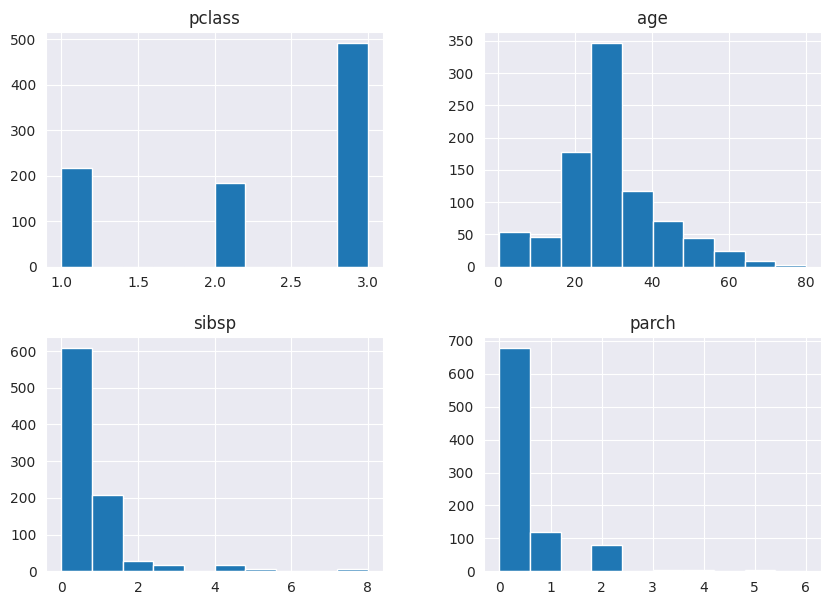

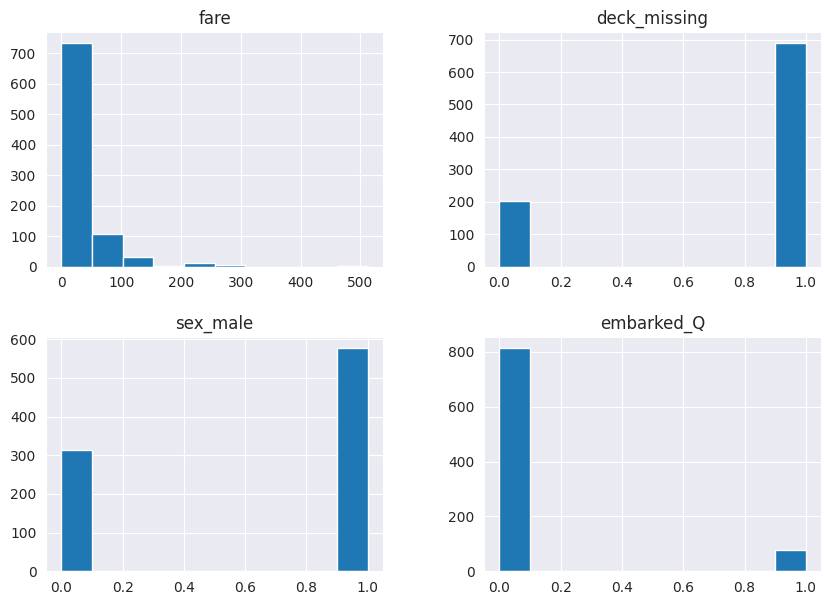

In [7]:
for i in range(5,df.shape[1]+1,4):

    viz = df.iloc[:,i-4:i]
    viz.hist(figsize = (10,7))
    plt.show()

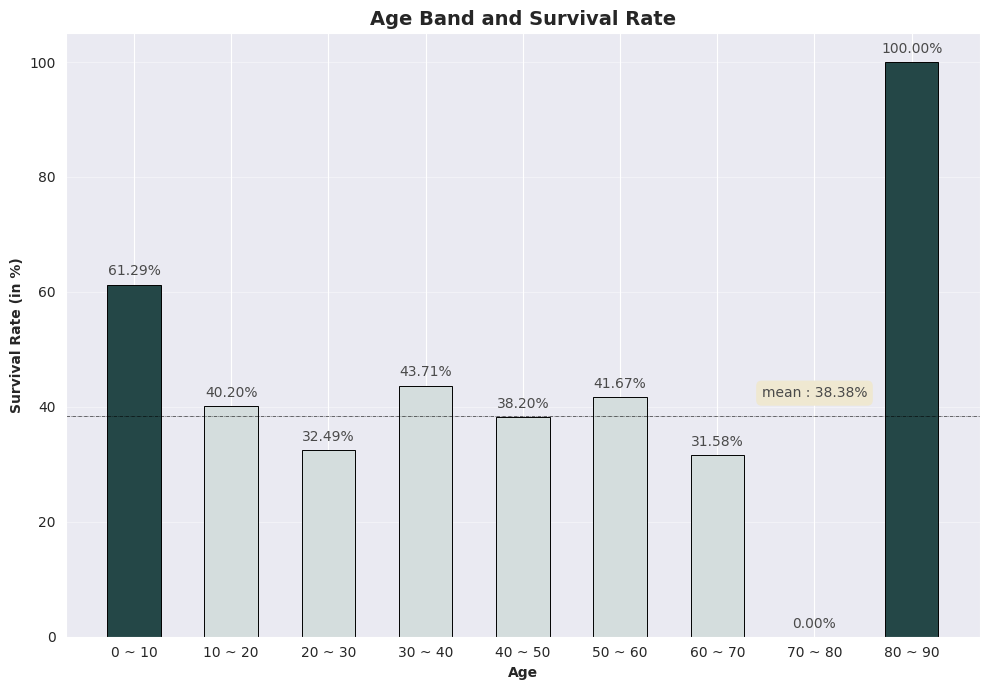

In [8]:

def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

new_df = pd.DataFrame()
new_df['age_band'] = df['age'].apply(age_band)
new_df['survived'] = df['survived']
titanic_age = new_df[['age_band', 'survived']].groupby('age_band')['survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' if titanic_age['survival rate'][i] < 60 else '#244747' for i in range(8)]

ax.bar(titanic_age['survival rate'].index, titanic_age['survival rate'],
       color = color_map, width=0.55,
       edgecolor='black',
       linewidth=0.7)


# for s in ["top","right","left"]:
#     ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['survival rate'].index:
    ax.annotate(f"{titanic_age['survival rate'][i]:.02f}%",
                   xy=(i, titanic_age['survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light',
                   color='#4a4a4a')


# mean line + annotation
mean = new_df['survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%",
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))


# Title & Subtitle
#fig.text(0.33, 1, 'Age Band and Survival Rate', fontsize=14, fontweight='bold', fontfamily='serif')
# fig.text(0.20, 0.0, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.xlabel("Age", fontweight='bold')
plt.ylabel("Survival Rate (in %)", fontweight='bold')
plt.title('Age Band and Survival Rate', fontsize=14, fontweight='bold', fontfamily='sans-serif')
plt.tight_layout()
plt.show()

#### <center>It can be seen that the survival rate of young children and the elderly is high.

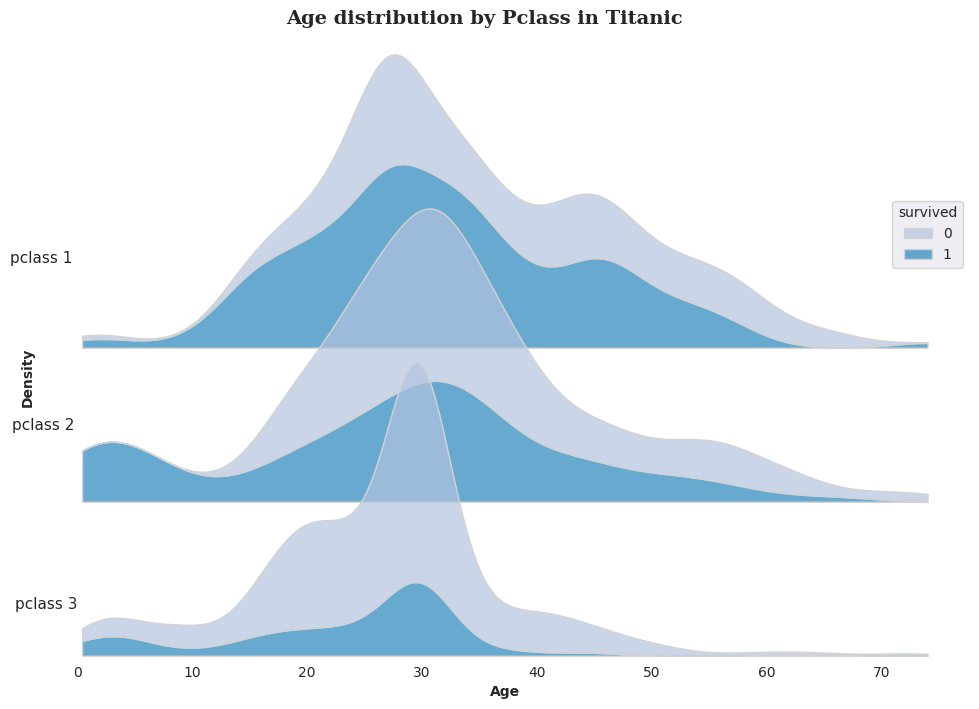

In [9]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.5)
axes = list()
for idx, cls in zip(range(3), sorted(df['pclass'].unique())):
    axes.append(fig.add_subplot(gs[idx, 0]))

    sns.kdeplot(x='age', data=df[df['pclass']==cls], fill=True, ax=axes[idx], cut=0, bw_method=0.25,
                edgecolor='lightgray', hue='survived', multiple="stack", palette='PuBu', alpha=0.7)

    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

    for spines in ["top","right","left","bottom"]:
        axes[idx].spines[spines].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(0.01,0.01,f'pclass {cls}',fontweight="normal", fontfamily='sans-serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()

plt.grid(alpha=0)
plt.xlabel("Age", fontweight="bold")
plt.ylabel("Density", fontweight="bold", loc = 'top')

fig.text(0.33,0.9,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=14)
plt.show()

In [10]:
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   age           891 non-null    float64
 3   sibsp         891 non-null    int64  
 4   parch         891 non-null    int64  
 5   fare          891 non-null    float64
 6   deck_missing  891 non-null    int64  
 7   sex_male      891 non-null    uint8  
 8   embarked_Q    891 non-null    uint8  
 9   embarked_S    891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


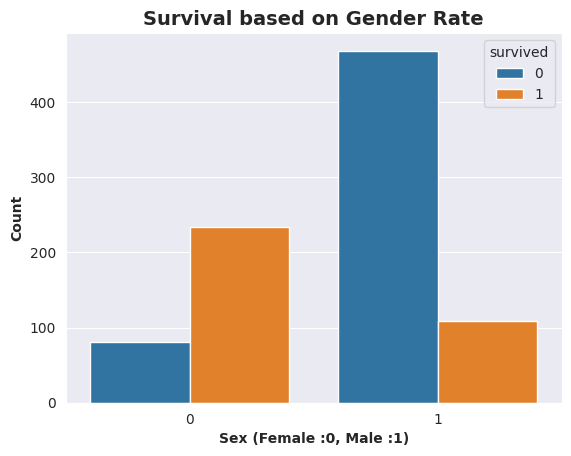

In [12]:
sns.countplot(x='sex_male', hue='survived',data = df)
plt.xlabel('Sex (Female :0, Male :1)',  fontweight='bold')
plt.ylabel('Count',  fontweight='bold')
plt.title('Survival based on Gender Rate', fontweight='bold', fontsize = 14)
plt.show()

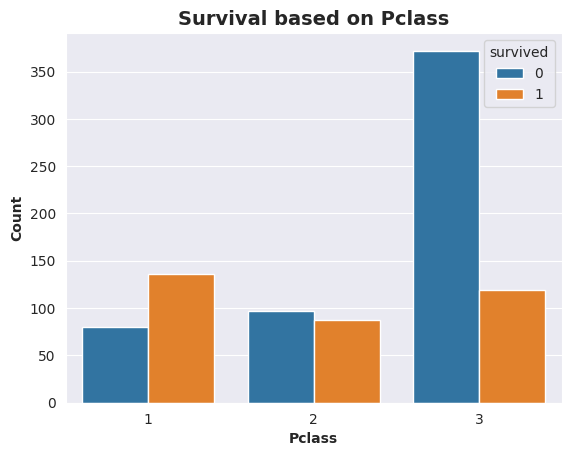

In [13]:
sns.countplot(x='pclass', hue='survived',data = df)
plt.xlabel('Pclass',  fontweight='bold')
plt.ylabel('Count',  fontweight='bold')
plt.title('Survival based on Pclass' , fontweight='bold', fontsize = 14)
plt.show()

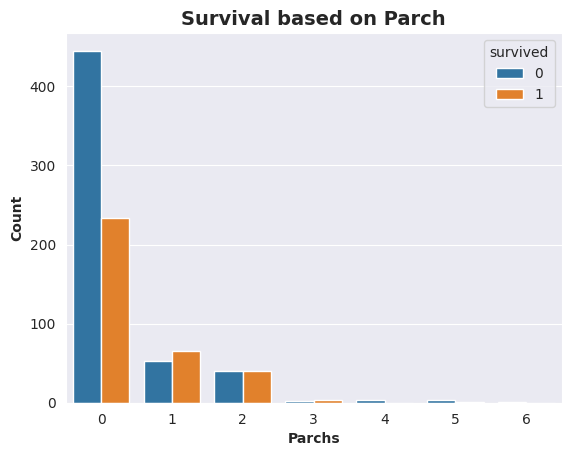

In [14]:
sns.countplot(x='parch', hue='survived',data = df)
#sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=new_df)
plt.xlabel('Parchs',  fontweight='bold')
plt.ylabel('Count',  fontweight='bold')
plt.title('Survival based on Parch',  fontweight='bold', fontsize = 14)
plt.show()

In [15]:
X = df.iloc[:, 1:]
y = df['survived']

In [16]:
print(f"Shape of X is {X.shape}\nShape of y is {y.shape}")

Shape of X is (891, 9)
Shape of y is (891,)


### Feature Engineering

In [17]:
X = StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.82737724, -0.5924806 ,  0.43279337, -0.47367361, -0.50244517,
         0.54319254,  0.73769513, -0.30756234,  0.61930636],
       [-1.56610693,  0.63878901,  0.43279337, -0.47367361,  0.78684529,
        -1.84096783, -1.35557354, -0.30756234, -1.61470971],
       [ 0.82737724, -0.2846632 , -0.4745452 , -0.47367361, -0.48885426,
         0.54319254, -1.35557354, -0.30756234,  0.61930636],
       [-1.56610693,  0.40792596,  0.43279337, -0.47367361,  0.42073024,
        -1.84096783, -1.35557354, -0.30756234,  0.61930636],
       [ 0.82737724,  0.40792596, -0.4745452 , -0.47367361, -0.48633742,
         0.54319254,  0.73769513, -0.30756234,  0.61930636]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 9) (712,)
Test set: (179, 9) (179,)


### Model Development

In [19]:
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(solver='liblinear')

In [20]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0])

In [21]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.86031058, 0.13968942],
       [0.86448322, 0.13551678],
       [0.31339299, 0.68660701],
       [0.07047297, 0.92952703],
       [0.92189973, 0.07810027],
       [0.47223102, 0.52776898],
       [0.10798037, 0.89201963],
       [0.37581399, 0.62418601],
       [0.72641538, 0.27358462],
       [0.90136379, 0.09863621],
       [0.90207697, 0.09792303],
       [0.79147581, 0.20852419],
       [0.26358581, 0.73641419],
       [0.92471811, 0.07528189],
       [0.10486296, 0.89513704],
       [0.69855288, 0.30144712],
       [0.90634903, 0.09365097],
       [0.5172881 , 0.4827119 ],
       [0.8461501 , 0.1538499 ],
       [0.1227604 , 0.8772396 ],
       [0.86246912, 0.13753088],
       [0.86532431, 0.13467569],
       [0.86399923, 0.13600077],
       [0.86389865, 0.13610135],
       [0.24868222, 0.75131778],
       [0.41502023, 0.58497977],
       [0.07607749, 0.92392251],
       [0.05168423, 0.94831577],
       [0.90209434, 0.09790566],
       [0.87331926, 0.12668074],
       [0.

### Model Evaluation

In [22]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7956204379562044

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 42  18]
 [ 10 109]]


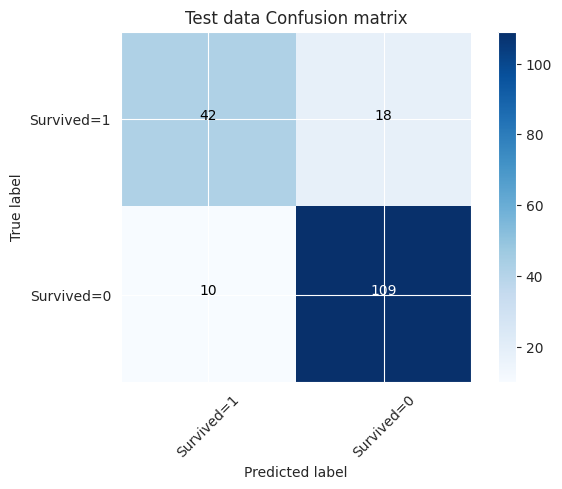

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
# np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Test data Confusion matrix')

In [25]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       119
           1       0.81      0.70      0.75        60

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



In [26]:
metrics.f1_score(y_test, yhat)

0.75